# One-step projection experiments

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import math
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
import h5py
from keras.optimizers import Adamax, Nadam
import sys
import pickle

from interval import interval, inf

sys.path.append('/Users/nishant/Dropbox (University of Michigan)/research/verified-ml/SafeVerticalCAS/GenerateNetworks')
from utils.safe_train import *

In [5]:
def asymMSE(y_true, y_pred):
    d = y_true - y_pred
    maxes = tf.argmax(y_true, axis=1)
    maxes_onehot = tf.one_hot(maxes, numOut)
    others_onehot = maxes_onehot - 1
    d_opt = d * maxes_onehot
    d_sub = d * others_onehot
    a = lossFactor * (numOut - 1) * (tf.square(d_opt) + tf.abs(d_opt))
    b = tf.square(d_opt)
    c = lossFactor * (tf.square(d_sub) + tf.abs(d_sub))
    d = tf.square(d_sub)
    loss = tf.where(d_sub > 0, c, d) + tf.where(d_opt > 0, a, b)
    return tf.reduce_mean(loss)

# Load weights

In [7]:
standard_model = keras.models.load_model("models/aug-08-standard-model-epoch-01.keras", custom_objects={"asymMSE": asymMSE})
standard_model

 44/304 [===>..........................] - ETA: 0s

2023-08-08 12:55:36.166703: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-08 12:55:36.199480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


304/304 [==============================] - 1s 2ms/step


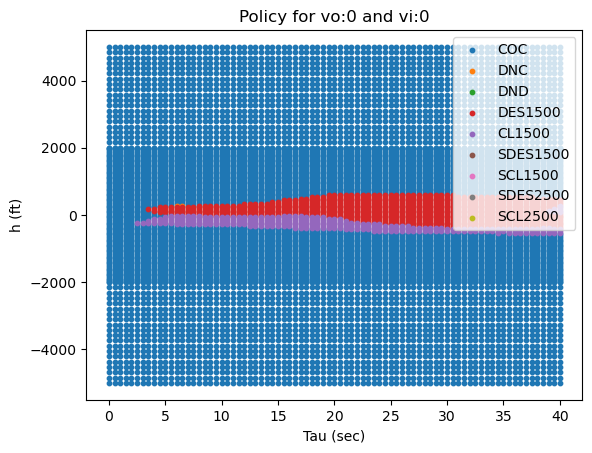

In [8]:
plot_policy(standard_model)